### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
import numpy as np

### Constants

In [2]:
basedir = Path("/Users/tusharsingh/Work/Project/DL-cdr3-tumor")
jsonl_file = basedir / "processed"/"cdr3_tumor_normal.jsonl"
plot_dir = basedir / "plots"

### Load Data

In [3]:
data = []
with open(jsonl_file, 'r') as f:
    for line in f:
        record = json.loads(line)
        data.append(record)

df = pd.DataFrame(data)
df['cdr3_count'] = df['cdr3s'].apply(len)
df.head()

,Sample ID,cdr3s,label,cdr3_count
0,C3L-03976-05,"[[3, 2, 17, 10, 7, 18, 17, 2, 18, 4, 18, 15, 2...",tumor,40
1,C3N-03076-03,"[[3, 17, 19, 15, 7, 7, 18, 8, 18, 5, 2, 6, 6, ...",normal,40
2,C3N-00293-05,"[[3, 17, 19, 15, 18, 7, 2, 13, 19, 11, 18, 6, ...",normal,40
3,C3L-01682-07,"[[3, 2, 17, 17, 11, 16, 18, 7, 7, 5, 13, 9, 15...",normal,40
4,C3L-02969-06,"[[3, 2, 17, 17, 12, 7, 15, 11, 13, 5, 10, 11, ...",normal,40


#### Patient Count per Class

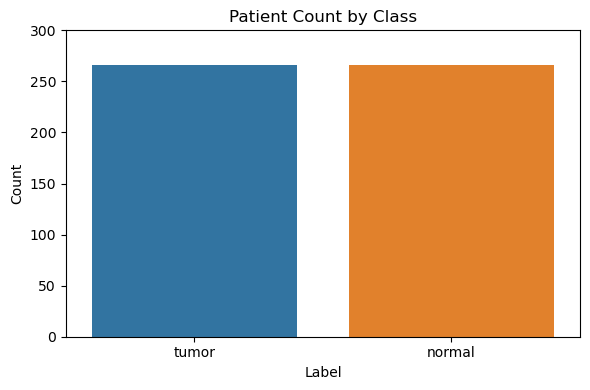

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label', hue = "label")
plt.title("Patient Count by Class")
plt.ylabel("Count")
plt.xlabel("Label")
plt.tight_layout()
plt.ylim(0,300)
plt.savefig(plot_dir / "patient_count_by_label.png")
plt.show()


#### CDR3 Length Distribution (from tokenized sequences)

In [5]:
def get_valid_cdr3_lengths(tokenized_cdr3s, pad_token_id=0):
    return [sum(1 for token in seq if token != pad_token_id) for seq in tokenized_cdr3s]

df['cdr3_lengths'] = df['cdr3s'].apply(get_valid_cdr3_lengths)
df['mean_length'] = df['cdr3_lengths'].apply(np.mean)
df['std_length'] = df['cdr3_lengths'].apply(np.std)

### Boxplot of Mean CDR3 Length per Patient (by Label)

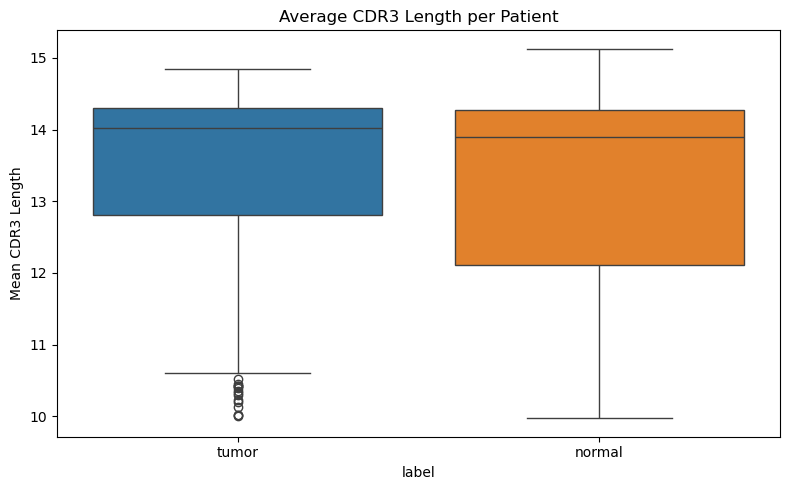

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='label', y='mean_length', hue = "label")
plt.title("Average CDR3 Length per Patient")
plt.ylabel("Mean CDR3 Length")
plt.tight_layout()
plt.savefig(plot_dir / "cdr3_mean_lengths_boxplot.png")
plt.show()

#### Histogram of CDR3 Lengths (All Seqs Flattened)

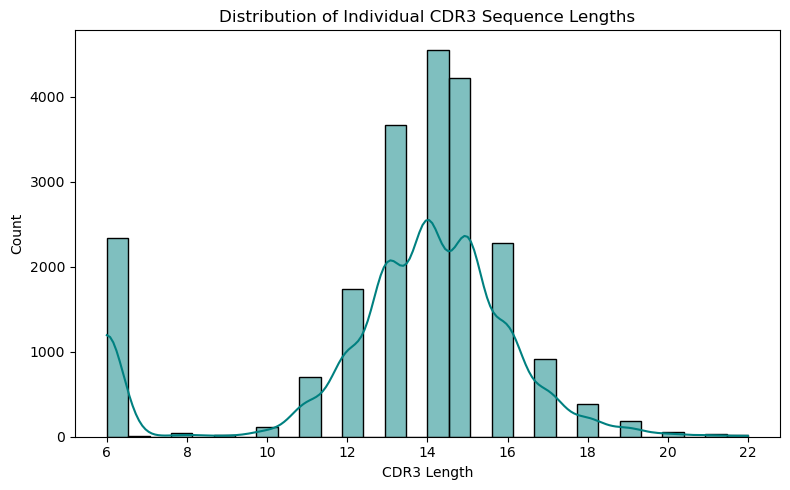

In [7]:
all_lengths = sum(df['cdr3_lengths'].tolist(), [])  # Flatten
plt.figure(figsize=(8, 5))
sns.histplot(all_lengths, bins=30, kde=True, color="teal")
plt.title("Distribution of Individual CDR3 Sequence Lengths")
plt.xlabel("CDR3 Length")
plt.tight_layout()
plt.savefig(plot_dir / "cdr3_lengths_distribution.png")
plt.show()

#### Correlation — Mean Length vs. Label (Optional)

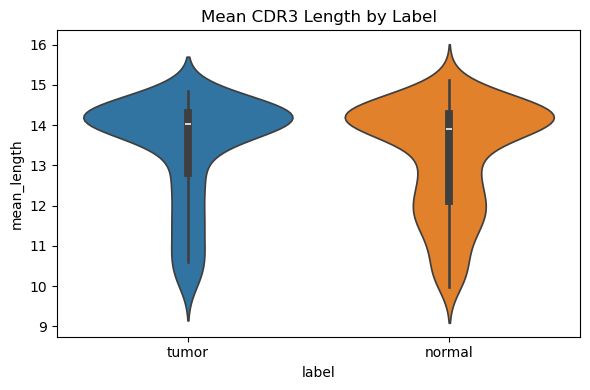

In [8]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x='label', y='mean_length',hue = "label")
plt.title("Mean CDR3 Length by Label")
plt.tight_layout()
plt.savefig(plot_dir / "mean_length_by_label.png")
plt.show()